In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
import re
from nltk.stem.porter import PorterStemmer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
df = pd.read_csv('/content/drive/My Drive/Subway/fraudTrain.csv')

In [3]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [4]:
df.shape

(1296675, 23)

In [7]:
df.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


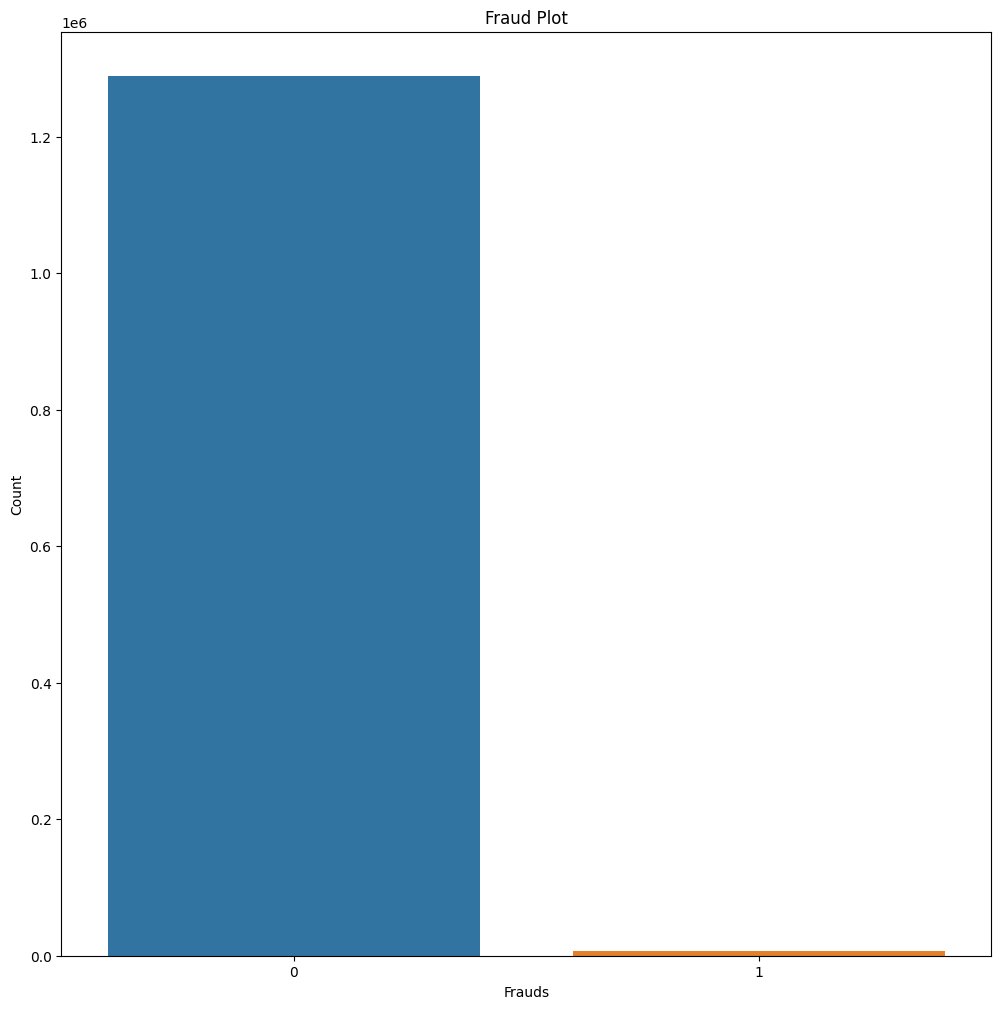

In [11]:
plt.figure(figsize=(12,12))
sns.countplot(x='is_fraud', data=df)
plt.xlabel('Frauds')
plt.ylabel('Count')
plt.title('Fraud Plot')
plt.show()

In [13]:
frauds = list(df['is_fraud'].unique())
frauds.sort()
frauds

[0, 1]

In [14]:
df.isna().any()

Unnamed: 0               False
trans_date_trans_time    False
cc_num                   False
merchant                 False
category                 False
amt                      False
first                    False
last                     False
gender                   False
street                   False
city                     False
state                    False
zip                      False
lat                      False
long                     False
city_pop                 False
job                      False
dob                      False
trans_num                False
unix_time                False
merch_lat                False
merch_long               False
is_fraud                 False
dtype: bool

In [15]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [28]:

import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.naive_bayes import CategoricalNB
from sklearn import metrics

data = df
le = OrdinalEncoder()
data[['trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud']] = le.fit_transform(
    data[['trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud']])

Features = ['trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long']
X = data[Features]
Y = data['is_fraud']

clf_nb = CategoricalNB()
clf_nb.fit(X,Y)

# y_pred = clf.predict(X)
# print(Y)
# print(y_pred)

# print("Accuracy : " , metrics.accuracy_score(y_pred,Y) * 100)

CategoricalNB()

In [29]:
clf_lr = LogisticRegression(max_iter=1000)
clf_lr.fit(X, Y)

# y_pred = clf_lr.predict(X)
# print(Y)
# print(y_pred)

# print("Accuracy : ", metrics.accuracy_score(y_pred, Y) * 100)

LogisticRegression(max_iter=1000)

In [ ]:
from sklearn.svm import SVC


clf_svm = SVC(kernel='linear')
clf_svm.fit(X, Y)

In [31]:
y_pred = clf_nb.predict(X)
print(Y)
print(y_pred)

print("Accuracy : " , metrics.accuracy_score(y_pred,Y) * 100)

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
1296670    0.0
1296671    0.0
1296672    0.0
1296673    0.0
1296674    0.0
Name: is_fraud, Length: 1296675, dtype: float64
[0. 0. 0. ... 0. 0. 0.]
Accuracy :  92.29274876125476


In [32]:
y_pred = clf_lr.predict(X)
print(Y)
print(y_pred)

print("Accuracy : " , metrics.accuracy_score(y_pred,Y) * 100)

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
1296670    0.0
1296671    0.0
1296672    0.0
1296673    0.0
1296674    0.0
Name: is_fraud, Length: 1296675, dtype: float64
[0. 0. 0. ... 0. 0. 0.]
Accuracy :  99.39792160718761


In [ ]:
y_pred = clf_svm.predict(X)
print(Y)
print(y_pred)

print("Accuracy : " , metrics.accuracy_score(y_pred,Y) * 100)

In [33]:
tt = pd.read_csv('/content/drive/My Drive/Subway/fraudTest.csv')

tt[['trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud']] = le.fit_transform(
    tt[['trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud']])

XX= tt[Features]
YY = tt['is_fraud']



In [34]:
yy_pred = clf_nb.predict(XX)
print(YY)
print(yy_pred)

print("Accuracy : " , metrics.accuracy_score(yy_pred,YY) * 100)

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
555714    0.0
555715    0.0
555716    0.0
555717    0.0
555718    0.0
Name: is_fraud, Length: 555719, dtype: float64
[0. 0. 0. ... 0. 0. 0.]
Accuracy :  72.92966409282388


In [35]:
yy_pred = clf_lr.predict(XX)
print(YY)
print(yy_pred)

print("Accuracy : " , metrics.accuracy_score(yy_pred,YY) * 100)

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
555714    0.0
555715    0.0
555716    0.0
555717    0.0
555718    0.0
Name: is_fraud, Length: 555719, dtype: float64
[0. 0. 0. ... 0. 0. 0.]
Accuracy :  99.4983075979047


In [ ]:
yy_pred = clf_svm.predict(XX)
print(YY)
print(yy_pred)

print("Accuracy : " , metrics.accuracy_score(yy_pred,YY) * 100)